# Shorten ASSIST Data for testing

In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt

/Users/dzalkind/opt/anaconda3/envs/dm-env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
filename = '/Users/dzalkind/Tools/AWAKEN_data/ingest-awaken/ingest/assist_nwtc/tests/data/input/nwtc.assist.z02.00.20220512.000124.assistsummary.cdf'
parts = os.path.split(filename)
shortfile = os.path.join(parts[0],f'short.{parts[-1]}')
ds = xr.load_dataset(filename)

# print(shortfile)

/Users/dzalkind/opt/anaconda3/envs/dm-env/lib/python3.8/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
frac = 0.05 # to shrink to 

max_time = ds.time.max()
ds_smol = ds.where(ds.time < max_time * frac, drop=True)
ds_smol.to_netcdf(shortfile)



Investigate fraction vs. size

In [5]:
fracs = np.linspace(0.01,.1,num=10)
fs = np.zeros(len(fracs))

for i, frac in enumerate(fracs):
    ds_smol = ds.where(ds.time < max_time * frac, drop=True)
    ds_smol.to_netcdf('test.nc')
    fs[i] = os.path.getsize('test.nc')
    
    

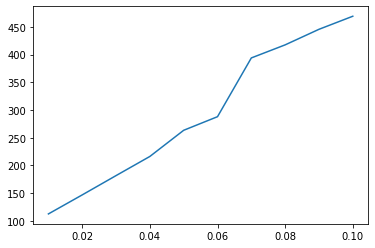

In [6]:
plt.plot(fracs,fs / 1000)